참고 
https://tensorflow.blog/4-%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-%EC%8B%B1%EA%B8%80-%EB%A0%88%EC%9D%B4%EC%96%B4-%EB%89%B4%EB%9F%B4-%EB%84%A4%ED%8A%B8%EC%9B%8C%ED%81%AC-first-contact-with-tensorflow/

https://codeonweb.com/entry/314953bb-1c35-4642-9083-4467427eaab5?course=1c3cc19f-b64b-42f7-838b-24b875c53c86

http://www.incodom.kr/MNIST

In [35]:
import keras
print(keras.__version__)

[Backend.AI] The kernel is not found (maybe terminated due to idle/exec timeouts).
[Backend.AI] Please restart the kernel to run again.


In [36]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

[Backend.AI] The kernel is not found (maybe terminated due to idle/exec timeouts).
[Backend.AI] Please restart the kernel to run again.


#### train : 훈련셋, train_images 에는 손글씨, 어떤 숫자를 의미하는지 정답을 써놓은 traing labels로 구성되어 있다.

### mnist 데이터
이미지 데이터 중에서 가장 기본이 되는 데이터셋입니다. 이 데이터 셋은 우편번호에 사용되는 0부터 9까지의 숫자들을 사람이 직접 쓴 손글씨 이미지들로 구성이 되어 있습니다. 케라스 데이터셋 패키지를 이용하여 쉽게 부르고 사용할 수 있습니다. 훈련데이터와 시험 데이터를 불러준다.

머신러닝 방법은 감독 학습(supervised learning)

In [3]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

이미지데이터가 실제로는 픽셀 데이터로 구성이 되어있다는 것을 확인할 수 있습니다.

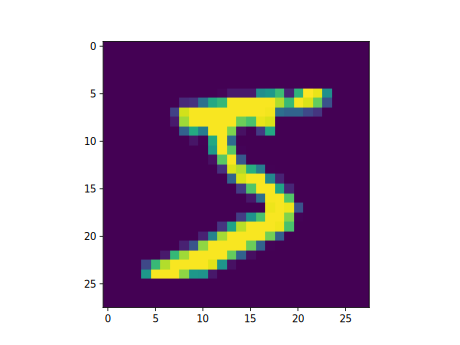

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
plt.show()

그래프 모듈을 사용하여 이미로 확인한 모습. 이 첫번째 데이터는 학습을 위한 5를 손글씨로 쓴 이미지인 것 같죠. 정말 5가 맞는지는 라벨 정보에 있으므로 결과 데이터의 첫 번째 데이터를 확인해보면 됩니다.

In [7]:
print(train_labels[0])

5


In [8]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[5 0 4 ..., 5 6 8]


In [9]:
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(10000, 28, 28)
10000
[7 2 1 ..., 4 5 6]


## normalize
mnist 이미지 데이터들은 흑백이지만, 그 진하기에 따라 0~255까지의 숫자로 되어있습니다.
0은 하얀색이고, 255는 검정색입니다.
이를 0~1사이의 값으로 Nomalize해줍니다.

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

float32 변환은 나누기 연산을 하기 때문에 /255는 0~1 사이 값을 가지게 하기 위함

## Preprocess class labels for Keras.
이미지 데이터(인풋)을 reshape 해줬으니, 이번엔 라벨즈 데이터(아웃풋, class or label)도 수정을 해줘야합니다.
One-hot encoding으로 수정을 해줄 것인데,
간단하게 설명드리면 0~9까지의 숫자중에서 5를 One-hot encoding으로 표현하게 되면,
5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] 로 바뀌게 됩니다.

In [12]:
print (train_labels[:10])

[5 0 4 1 9 2 1 3 1 4]


In [37]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

[Backend.AI] The kernel is not found (maybe terminated due to idle/exec timeouts).
[Backend.AI] Please restart the kernel to run again.


In [38]:
print (train_labels[:10])

[Backend.AI] The kernel is not found (maybe terminated due to idle/exec timeouts).
[Backend.AI] Please restart the kernel to run again.


## 모델링, 구축
데이터셋을 생성하는게 모두 끝났습니다. 
이제 모델을 구성할 것인데요. 앞서 keras 특징에서 설명한것처럼 시퀀스 모델을 생성한 뒤 필요한 레이어를 추가하며 구성합니다.

In [39]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

[Backend.AI] The kernel is not found (maybe terminated due to idle/exec timeouts).
[Backend.AI] Please restart the kernel to run again.


렐루(ReLU, Rectified Linear Unit) 활성화 함수는 최근 딥 뉴럴 네트워크의 히든 레이어에서 사용되는 기본 활성화 함수가 되었습니다. 이 함수는 간단한데 max(0, x) 로서 음수의 경우 0 을 리턴하고 그 외에는 x 를 리턴합니다. 

-softmax

여기서 풀려는 문제는 입력 이미지가 주어졌을 때 0~9 까지 각 숫자와 얼마나 비슷한지에 대한 확률을 얻으려는 것임을 기억해 두세요. 예를 들면 우리 모델이 어떤 이미지에 대해 “9” 일 확률이 80% 이고 “8” 일 확률이 5%(9의 애매한 꼬리 부분으로 인해) 이며 다른 숫자에 대해서는 낮은 확률을 예측할 수 있습니다. 손글씨 숫자를 인식하는 것엔 어느정도 불확실한 부분이 있고 100% 확신을 가지고 하긴 어렵습니다. 이런 경우에 확률 분포는 예측에 대해 얼마나 신뢰할 수 있는지에 대해 좋은 정보를 제공합니다.

그래서 우리는 상호 배타적인 레이블에 대한 결과로 확률 분포를 담은 출력 벡터를 가집니다. 10개의 확률 값을 가진 이 벡터는 각각 0 에서 9 까지의 숫자에 대응되는 것이고 확률의 전체 합은 1 입니다.

앞서 언급한 것 처럼 이 벡터는 출력 레이어를 소프트맥스 활성화 함수로 구성하여 얻어집니다. 소프트맥스 함수를 사용한 뉴런의 출력 값은 그 레이어의 다른 뉴런의 출력 값에 영향을 받게 되고 그들의 출력 값 합은 1 이 되어야 합니다.

우선 network를 추가하고, network.add를 통해 인풋과 아웃풋 데이터를 설정한다. 마지막으로 compile을 하면서 데이터를 훈련시킨다.

신경망의 핵심 블록은 "계층"이란 데이터를 처리하는 모듈인데 데이터에 대한 "필터" 같은 거라고 생각하시면 됩니다. 어떤 데이터가 들어와서 좀 더 쓸만한 형태로 바뀌어서 나갑니다. 정확하게 말하자면, 계층에 주어지는 데이터에서 문제를 다루는 데에 있어 좀 더 의미가 있을 표현을 추출해 냅니다. 대부분의 심층학습은 실제로 점진적인 "데이터 증류" 형태를 구현하는 단순한 계층 간의 연결로 구성됩니다. 심층학습 모델은 데이터를 처리하는 체와 같이 점점 더 정교해지는 데이터 필터(바로 계층이죠)의 연속으로 이루어집니다.

우리 신경망은 두 개의 Dense 계층의 연속으로 이루어져 있습니다. Dense 계층은 '연결 밀도가 빽빽한(densely-connected)'('완전히 연결된, fully-connected'이라고도 합니다) 신경망 계층입니다. 두 번째(이자 마지막) 계층은 10개 범주의 "소프트맥스" 계층으로, 합계가 1이 되는 10개의 확률 점수의 배열을 반환합니다. 각 점수는 현재의 숫자 이미지가 10개 숫자 분류 각각에 속할 확률입니다.

### 모델 학습과정 설정
학습하기 전, 학습에 대한 설정을 수행합니다.
손실함수 및 최적화 방법을 정의하고 케라스에서는 compile 함수를 사용합니다.

우리 신경망을 훈련시킬 준비를 하기 위해 컴파일 단계로 3가지를 더 선택해야 합니다:

### 손실 함수
훈련 데이터에 대해 얼마나 신경망이 얼마나 잘 맞아들어가고 있는지 측량하여 바람직한 방향으로 조정하는 척도입니다.
### 최적화기
신경망이 받은 데이터와 손실 함수에 기반하여 스스로를 업데이트하는 메커니즘입니다.
### 메트릭
훈련 및 시험 중에 모니터링할 측정값입니다. 여기서는 정확도(올바르게 분류된 이미지의 비율)만을 모니터링합니다.
손실 함수와 최적화기의 정확한 목적은 다음 두 장에 걸쳐 명쾌하게 알아보도록 하겠습니다.

In [19]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### 모델 학습
훈련셋을 이용하여 구성한 모델로 학습을 시킵니다.
케라스에서는 fit() 함수를 사용합니다.
epochs=5 : 총 5번 훈련.
batch_size=128 : 한 번에 128개씩 훈련.

In [18]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.2567 - acc: 0.9259
Epoch 2/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.1024 - acc: 0.9701
Epoch 3/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.0670 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.0487 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.0370 - acc: 0.9887


### 학습과정 살펴보기
모델 학습시, 훈련셋, 검증셋의 손실(loss), 정확도(acc)을 측정합니다.
반복횟수에 따른 손실 및 정확도 추이를 보면서 학습상황을 판단합니다.

In [20]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 51us/step


### 모델 평가
#### - 준비된 시험셋으로 학습한 모델을 평가합니다.
#### - 케라스에서는 evaluate() 함수를 사용합니다

In [21]:
print('test_acc:', test_acc)

test_acc: 0.98


## cnn : 합성곱 신경망(cnn) 사용

콘볼루션 뉴럴 네트워크의 주요 목적은 테두리(edge), 선(line), 색깔 등 이미지의 시각적 특징이나 성질을 감지하는 것입니다. 이것은 입력 레이어와 연결된 히든 레이어에 의해 처리됩니다. CNN은 재미있게도 입력 데이터가 첫번째 히든 레이어의 뉴런에 완전히 모두 연결되어(fully connected) 있지 않습니다. 이미지의 픽셀 정보를 저장하고 있는 입력 뉴런의 작은 일부 영역이 하나의 히든 레이어 뉴런과 연결됩니다. 그림으로 보면 아래와 같습니다.

정확하게 말하면 이 예에서 히든 레이어의 각 뉴런은 입력 레이어의 3x3 영역(즉 25개의 뉴런)과 연결됩니다.

이것을 입력 이미지를 담고 있는 28×28 크기의 전체 입력 레이어를 흟고 지나가는 3x3 사이즈의 윈도우로 생각할 수 있습니다. 윈도우는 레이어의 전체 뉴런을 슬라이딩하여 지나갑니다. 그리고 윈도우의 각 위치마다 입력 데이터를 처리하기 위한 히든 레이어의 뉴런이 배정됩니다.

윈도우가 이미지의 왼쪽 위부터 시작되고 입력 레이어의 첫번째 뉴런이 그 정보를 받는다고 가정합니다. 그러면 다음 윈도우는 한 픽셀 오른쪽으로 이동하여 이 3x3 영역을 히든 레이어의 다음 뉴런과 연결합니다. 이런 식으로 왼쪽에서 오른쪽으로 위에서 아래로 전체 영역을 커버할 때까지 계속합니다.

In [24]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

첫번째 히든 레이어는 여러개의 커널(필터)로 구성됩니다. 이 예에서는 32개의 커널을 사용했습니다. 각 커널은 5×5 가중치 행렬 W 와 한개의 바이어스 b 로 정의되고 이 히든 레이어의 뉴런들에게 공통으로 사용됩니다.

위에 언급한 콘볼루션 레이어 이외에 풀링(pooling) 레이어라고 불리우는 레이어가 콘볼루션 레이어 뒤에 따라 오는게 일반적입니다. 풀링 레이어는 콘볼루션 레이어의 출력 값을 단순하게 압축해주고 콘볼루션 레이어가 생산해낸 정보를 컴팩트한 버전으로 만들어 줍니다. 이 예제에서는 콘볼루션 레이어의 2×2 영역을 풀링을 사용하여 하나의 포인트로 데이터를 압축하겠습니다.

이건 input_shape=(28, 28, 1) 인수를 첫 번째 계층에 넘겨주면 됩니다.

### input_shape
keras에서 cnn을 구현할 때 [width][height][pixels] 형태로 input을 받는다.
mnist 데이터는 28 x 28 손글씨 이미지이므로 width = 28, height =28을 입력합니다. pixes은 흑백이므로 1을 입력하고 컬러라면 3을 입력해주면 됩니다.

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


위에서 보시다시피 각 Conv2D, MaxPooling2D 계층의 출력은 (height, width, channels) 형태의 3차원 텐서 입니다. 너비와 높이 차원은 신경망으로 깊이 들어갈 수록 줄어드는 경향이 있습니다. 채널의 갯수는 Conv2D 계층으로 넘겨지는 첫 번째 인수로(여기서는 32 혹은 64) 조절할 수 있습니다.

다음 단계는 마지막 출력 텐서((3, 3, 64) 형태)를 이제 익숙한 연결 밀도가 빽빽한 분류기(classifier) 신경망, Dense 계층의 스택에 넣겠습니다. 분류기는 1차원인 벡터를 처리하는데 출력은 3차원의 텐서입니다. 그래서 우선은 3차원의 텐서를 1차원으로 평탄화(flatten)하고 두어 개의 Dense 계층을 추가합니다.

In [26]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

숫자가 10까지 종류이므로 10-way 분류를 할 것입니다. 10개 분류를 위한 마지막 계층은 10개의 출력과 소프트맥스 활성화를 사용하겠습니다. 이제 신경망은 다음과 같습니다:

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

보시다시피, (3, 3, 64) 출력은 (576,) 형태의 벡터로 평탄화되어서 두 개의 Dense 계층으로 들어갑니다.

In [28]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [29]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.1700 - acc: 0.9472
Epoch 2/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.0467 - acc: 0.9857
Epoch 3/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.0322 - acc: 0.9902
Epoch 4/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.0247 - acc: 0.9924
Epoch 5/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.0190 - acc: 0.9941


In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 84us/step


In [31]:
print(test_acc)

0.9918


1강의 연결 밀도가 빽빽한 신경망의 시험 정확도는 97.8% 였는데 비하여, 기초적인 합성곱을 이용한 신경망의 시험의 정확도는 99.3% 입니다: 